# Importing libraries

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Read and analyse data

In [516]:
df = pd.read_csv(r'1632300362534233.csv')
df = df.replace({True:1, False:0})
df['Area'] = df['Area'].replace(',', '',regex=True)
df['Area'] = df['Area'].astype(float)

j = 0
drop_list = []
for i in df['Address']:
    if type(i) != str:
        drop_list.append(j)
    j += 1
df = df.drop(drop_list) # remove nan type data for address
df = df.drop(df[df["Area"]>3000].index) # remove incorrect data for area

In [517]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3.451000e+03,3.451000e+03
mean,107.176181,2.081136,0.847580,0.915097,0.787308,5.376033e+09,1.792011e+05
std,71.183260,0.760107,0.359479,0.278778,0.409271,8.124787e+09,2.708262e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.419500e+09,4.731667e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,1000.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


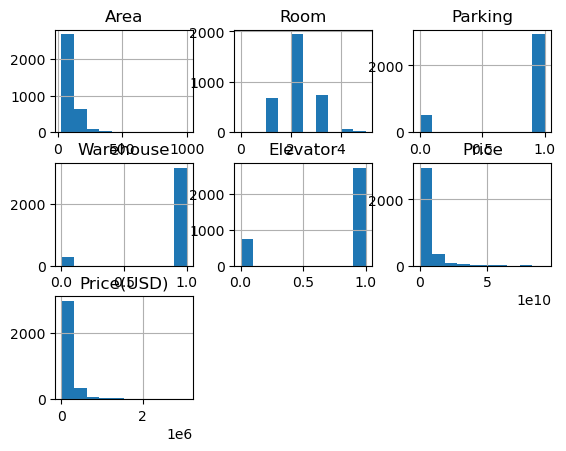

In [518]:
viz = df
viz.hist()
plt.show()

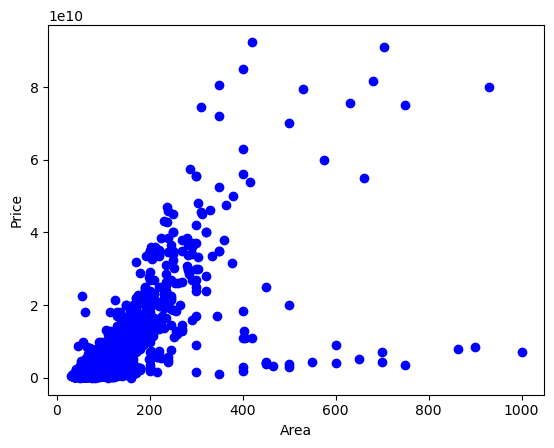

In [519]:
plt.scatter(df.Area, df.Price, color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

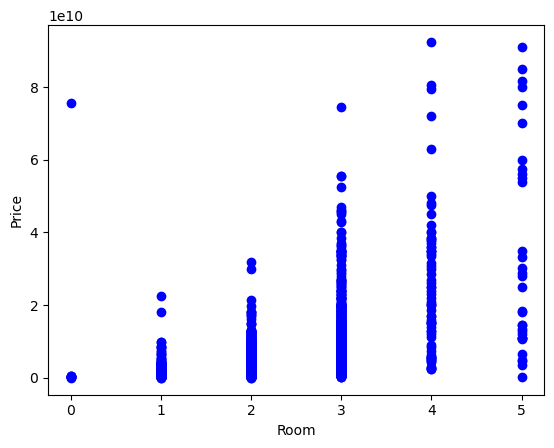

In [520]:
plt.scatter(df.Room, df.Price, color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

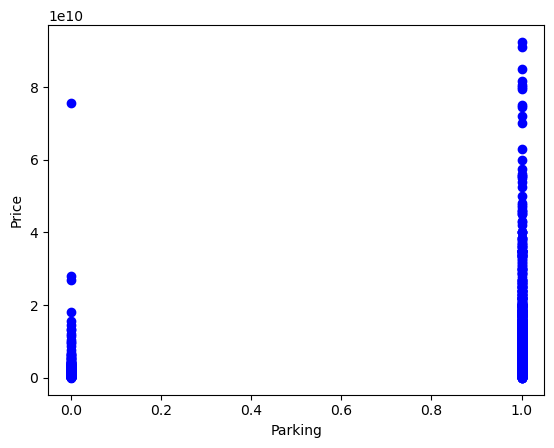

In [521]:
plt.scatter(df.Parking, df.Price, color='blue')
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

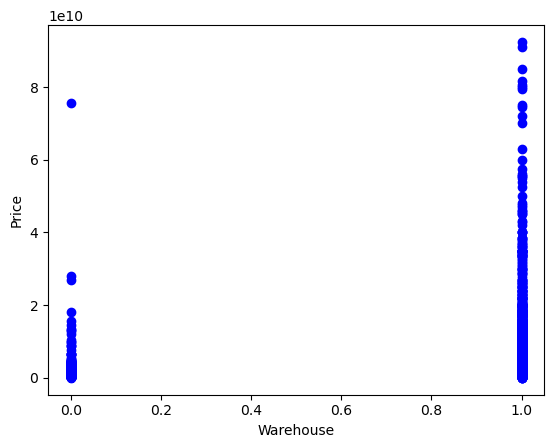

In [522]:
plt.scatter(df.Warehouse, df.Price, color='blue')
plt.xlabel("Warehouse")
plt.ylabel("Price")
plt.show()

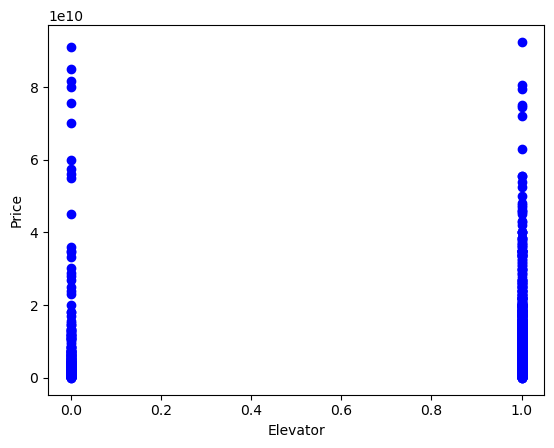

In [523]:
plt.scatter(df.Elevator, df.Price, color='blue')
plt.xlabel("Elevator")
plt.ylabel("Price")
plt.show()

# Train model and use it

In [535]:
cdf = df[["Area", "Room", "Parking", 'Warehouse','Elevator',"Price"]]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[["Area", "Room", "Parking", 'Warehouse']])
train_y = np.asanyarray(train["Price"])

test_x = np.asanyarray(test[["Area", "Room", "Parking", 'Warehouse']])
test_y = np.asanyarray(test[["Price"]])

regr = LinearRegression()
regr.fit(train_x, train_y)
print('Coeficients :', regr.coef_)
print('intercept:', regr.intercept_)

y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y - y_hat)))
print("Residual sum of suares: %.2f" %np.mean((test_y - y_hat)**2))
print("R2_score: ",r2_score(y_hat, test_y))

Coeficients : [6.63841327e+07 1.91548805e+09 2.58425693e+08 1.14682540e+09]
intercept: -6985742891.183973
Mean absolute error: 5463013394.50
Residual sum of suares: 74698424997997264896.00
R2_score:  -0.07038064008284128


In [536]:
train_x = np.asanyarray(train[["Area","Room", "Parking", 'Warehouse','Elevator']])
train_y = np.asanyarray(train["Price"])

test_x = np.asanyarray(test[["Area","Room", "Parking", 'Warehouse','Elevator']])
test_y = np.asanyarray(test[["Price"]])

poly = PolynomialFeatures(degree=4)

train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)


regr = LinearRegression()
regr.fit(train_x_poly, train_y)
# print('Coeficients :', regr.coef_)
# print('intercept:', regr.intercept_)

y_hat = regr.predict(test_x_poly)
print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y - y_hat)))
print("Residual sum of suares: %.2f" %np.mean((test_y - y_hat)**2))
print("R2_score: ",r2_score(y_hat, test_y))

Mean absolute error: 5501087051.32
Residual sum of suares: 92674783128691441664.00
R2_score:  0.6348846889966296
